In [177]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')



train_unprocessed.head()

CPU times: total: 766 ms
Wall time: 889 ms


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [178]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the Score of this prediction on the training set (for future cases, we'll calculate separately Train Score and Cross-validation Score).

Here is what we'll use to compare performances of our models:

Cross-val Score = (Average Cross-validation RMSE) + (1 Standard deviation of Cross-validation RMSE).

(we want to minimize this Score).

Score for this case will be just Train RMSE.

We'll save our intermediate results in DataFrame scores_df:

In [179]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train Score': [], 'Cross-val Score': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just median'
scores_df.loc[0, 'Train Score'] = score_00
scores_df.loc[0, 'Cross-val Score'] = np.nan
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,NaN


Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [180]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374


## Choosing number of cross-validation splits

We'll use LightGBM with n_estimators=10 as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values. Increasing n_estimators will improve performance, 

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function takes a number of TimeSeriesSplit slits as one of its arguments. 

We want such number of splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

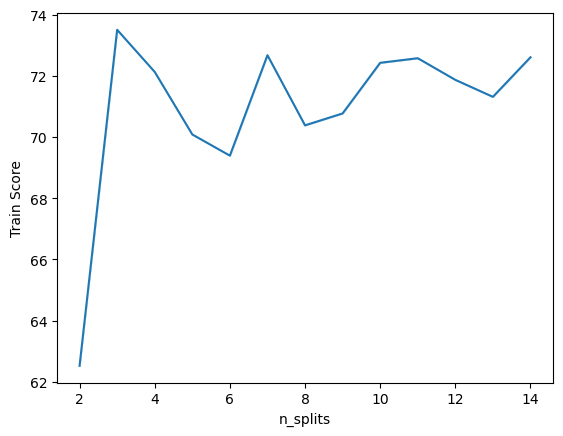

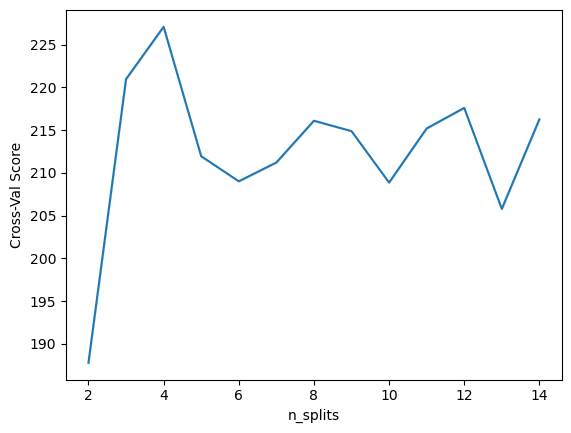

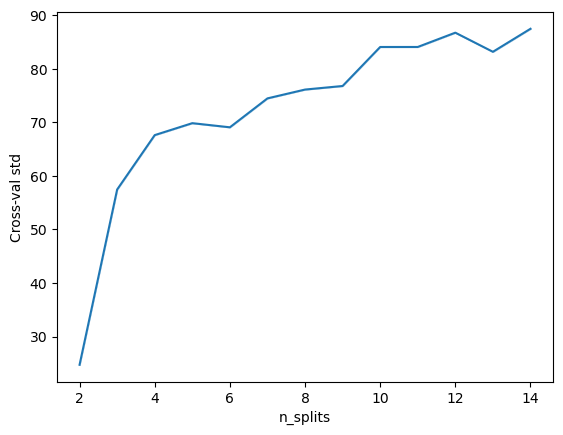

In [181]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 4 splits, for a good balance between bias, variance and execution time:

In [182]:
N_SPLITS = 4
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [183]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, n_estimators=10)

# Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_unprocessed, test_unprocessed, model, scores_df,
                                                                  comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 14.3 s
Wall time: 1.63 s


In [184]:
scores_df.loc[int(study_number), 'Test RMSE'] = 92.71815
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815


## UNUSED. Exploring train - test split

Let's look if some features act differently between training and test sets:

In [185]:
train = train_unprocessed.copy(deep=True)
test = test_unprocessed.copy(deep=True)

# Create a 'date' feature
train['date'] = pd.to_datetime(train_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(train_unprocessed.week_no.mul(7).astype(str) + ' days')
test['date'] = pd.to_datetime(test_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(test_unprocessed.week_no.mul(7).astype(str) + ' days')

# Create WeekCount feature
feature_name = 'WeekCount'
for data in [train, test]:
    
    data[feature_name] = (data['year'] - 2019) * 53 + data['week_no']
    
    print(data[feature_name].info())
    print(data[feature_name].describe())



<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
79023 non-null  int64
dtypes: int64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        79.000000
std         45.898729
min          0.000000
25%         39.000000
50%         79.000000
75%        119.000000
max        158.000000
Name: WeekCount, dtype: float64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
24353 non-null  int64
dtypes: int64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean       183.000000
std         14.142426
min        159.000000
25%        171.000000
50%        183.000000
75%        195.000000
max        207.000000
Name: WeekCount, dtype: float64


In [186]:
# ## Calculate Feature predictability based on WeekCount
# #from sklearn.metrics import mean_squared_error

# predictability = pd.Series(index=test.drop('date', axis=1).columns)

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

# for feature in test.drop('date', axis=1).columns:
#     #Drop NaNs
#     train_notna = train.loc[train[feature].notna(), :]
#     test_notna = test.loc[test[feature].notna(), :]
    
#     lr.fit(train_notna[['WeekCount']], train_notna[feature])
#     predictability[feature] = lr.score(test_notna[['WeekCount']], test_notna[feature])

    

In [187]:
# print('Least dependent of WeekCount features:')
# predictability.sort_values().head(15)

In [188]:
# import seaborn as sns

# train_and_test = pd.concat([train,test])

# train_and_test_by_date = train_and_test.groupby('date')


# for feature in predictability.sort_values().head(15).index:
#     fig, ax = plt.subplots(figsize=(12, 2))
#     sns.lineplot(data = train_and_test_by_date[feature].median(),
#              label=feature, ax=ax)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#     plt.show()


Looking at these graphs, I decided to exclude several features:

In [189]:
# excluded_features = predictability.sort_values()[:8].index.tolist()

# excluded_features.remove('week_no')

# features = set(test.columns) - set(excluded_features)

# train = train[features]
# train['emission'] = train_unprocessed['emission']

# test = test[features]
# print(train.shape)
# print(test.shape)

Let's look if this improves our scores:

In [190]:
# %%time

# study_number = '02'

# selected_columns = list(test.columns)
# selected_columns.remove('date')

# train_selected = train[selected_columns]
# train_selected = pd.concat([train_selected, train['emission']], axis=1)
# test_selected = test[selected_columns]


# train_score, cross_score, cross_scores_std, submission = \
#                 get_score(global_variables, train_selected, test_selected, model, scores_df,
#                                         comment="Removed features")

# submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [191]:
# scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
# scores_df

## Location Types

Note, latitude and longitude do not fully make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [192]:
feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. Let's try to identify groups of locations with similar 'emission' patterns:

In [193]:
## Create a pivot table

location_table = pd.pivot_table(train, index='date', columns='Location', values='emission')

location_table.head()

Location,-0.5129.29,-0.52829.472,-0.54729.653,-0.56930.031,-0.59829.102,-0.60429.896,-0.61530.885,-0.62729.773,-0.63730.763,-0.65330.447,...,-3.09529.505,-3.09929.601,-3.13329.467,-3.13630.364,-3.13830.662,-3.15330.347,-3.16128.839,-3.17429.926,-3.28729.713,-3.29930.301
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.750994,3.857115,0.500023,100.382980,0.076542,64.49460,76.600110,101.643295,40.153328,28.108765,...,5.375411,69.82686,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166
2019-01-08,4.025176,4.213432,0.529315,106.375980,0.081001,68.42294,82.630714,109.828674,41.531597,29.032100,...,5.420106,74.35756,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977
2019-01-15,4.231381,4.451489,0.554183,110.766335,0.084788,71.01155,86.668290,115.189064,42.774483,29.870031,...,5.327792,77.72222,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518
2019-01-22,4.305286,4.553981,0.561553,113.097940,0.085920,72.57178,88.741880,117.846870,43.542730,30.415354,...,5.422680,79.23992,120.618580,15.979696,25.591475,17.231894,0.119753,46.675327,47.163128,29.950650
2019-01-29,4.347317,4.676066,0.559731,114.985886,0.085650,73.83461,91.137010,120.702270,43.739470,30.567698,...,5.316918,80.32427,122.382960,15.905249,25.756530,17.642060,0.119364,47.317184,48.742470,30.572742


We'll create an elbow plot of explained variance by number of principal components:

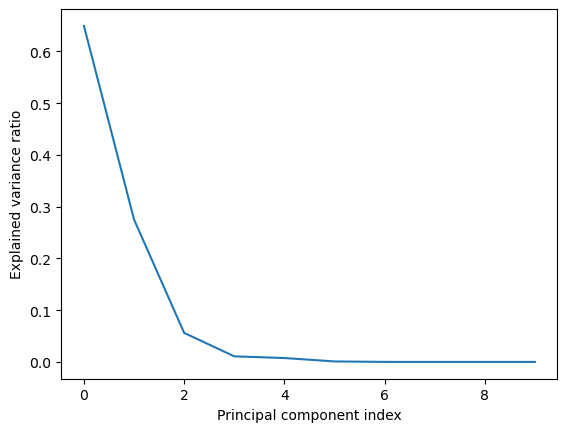

CPU times: total: 344 ms
Wall time: 169 ms


In [194]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

# Fit PCA
pca.fit(location_table)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

2 components explain most of the variance. Let's find the special locations:

In [195]:
%%time

# Recalculate PCA 
pca = PCA(n_components = 2)
pca.fit(location_table)

# Create importance dataframes
location_importances = pd.DataFrame(np.transpose(abs(pca.components_)), index = location_table.columns, columns=['PC1', "PC2"])


print('Locations sorted by PC1 imortance:')
location_importances.sort_values(by='PC1', ascending=False).head(10)

Locations sorted by PC1 imortance:
CPU times: total: 15.6 ms
Wall time: 16 ms


,PC1,PC2
Location,,
-2.07929.321,0.991361,0.088617
-2.37829.222,0.050352,0.164703
-1.34631.254,0.024180,0.048800
-1.51429.686,0.020555,0.189729
-1.31930.281,0.019428,0.149098
-2.33529.665,0.019208,0.137005
-2.15429.946,0.018832,0.142713
-0.95630.744,0.017227,0.044920
-1.88230.018,0.017226,0.120596


In [196]:
print('Locations sorted by PC2 imortance:')
location_importances.sort_values(by='PC2', ascending=False).head(10)

Locations sorted by PC2 imortance:


,PC1,PC2
Location,,
-1.51429.686,0.020555,0.189729
-2.59929.801,0.009692,0.184982
-2.37829.222,0.050352,0.164703
-1.48629.614,0.011875,0.160348
-2.29329.507,0.013203,0.160082
-2.37629.924,0.005365,0.150127
-1.31930.281,0.019428,0.149098
-2.15429.946,0.018832,0.142713
-2.33529.665,0.019208,0.137005


In [197]:
special_locations = location_importances.sort_values(by='PC1', ascending=False).index[:2].tolist()
    
special_locations

['-2.07929.321', '-2.37829.222']

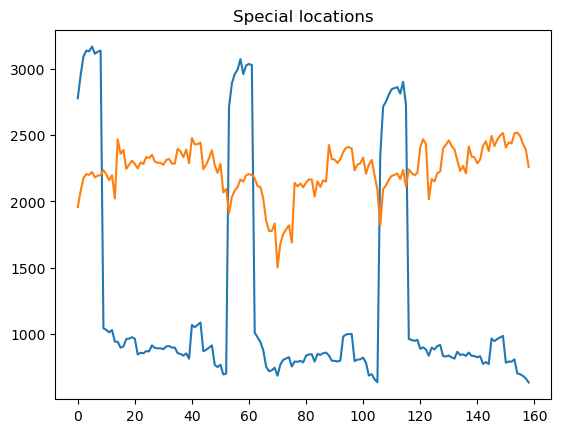

CPU times: total: 484 ms
Wall time: 162 ms


In [198]:
%%time


for location in special_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)
plt.title('Special locations')
plt.show()

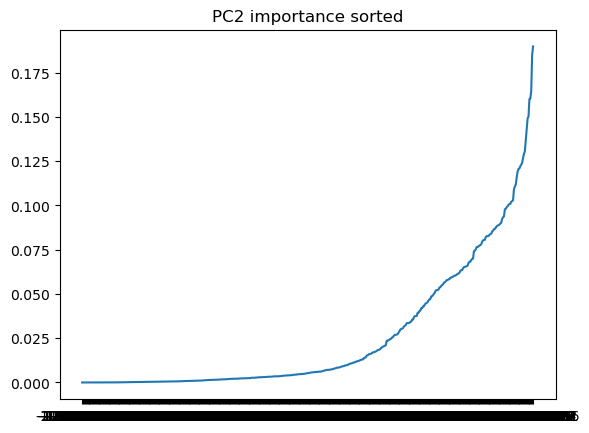

In [199]:
plt.plot(location_importances['PC2'].sort_values(ascending=True))
plt.title('PC2 importance sorted')
plt.show()

Playing with border_importane parameter we can separate the rest of locations in two distinct groups with common patterns:

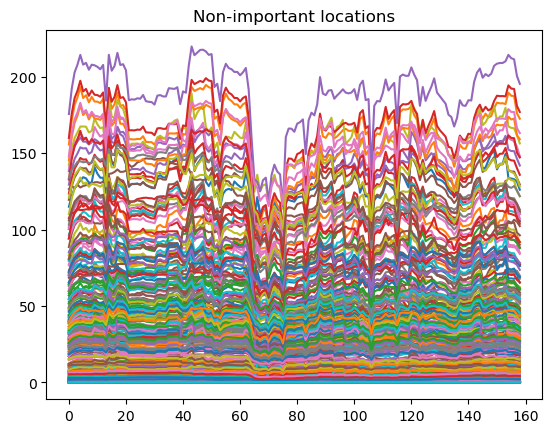

CPU times: total: 312 ms
Wall time: 428 ms


In [200]:
%%time



border_importance = location_importances['PC2'].quantile(0.65)

non_important_locations = location_importances.loc[location_importances['PC2'] < border_importance].index.to_list()
important_locations = location_importances.loc[location_importances['PC2'] >= border_importance].index.to_list()
important_locations = list(set(important_locations) - set(special_locations))
assert(len(non_important_locations) + len(important_locations) + len(special_locations) == len(location_table.columns))

for location in non_important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)  

plt.title('Non-important locations')
plt.show()

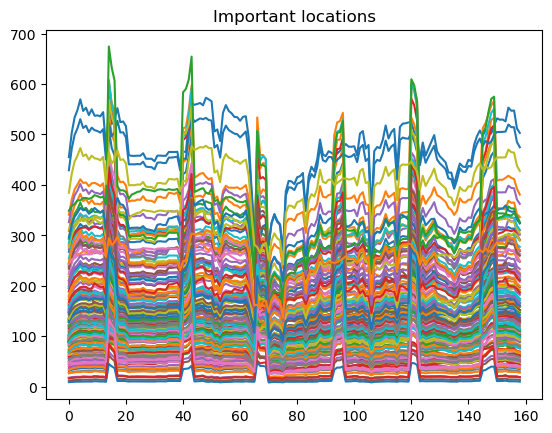

CPU times: total: 281 ms
Wall time: 317 ms


In [201]:
%%time

for location in important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)    
plt.title('Important locations')
plt.show()

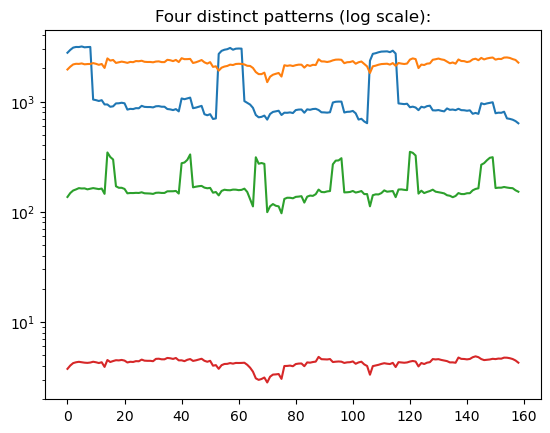

In [202]:
four_representatives = special_locations.copy()
four_representatives.append(important_locations[0])
four_representatives.append(non_important_locations[0])

fig, ax = plt.subplots()
for location in four_representatives:
    series = location_table[location]
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns (log scale):')
ax.set_yscale('log')
plt.show()

One of the special locations has a pattern similar to the patterns for the low emissions locations, but, since it has high emission, I will still explore it separately.

In [203]:
%%time

feature_name = 'Location_group'

location_importances[feature_name] = ['High' if location in important_locations else \
                           'Low' if location in non_important_locations else \
                          "Special 1" if location == special_locations[0] else \
                          "Special 2" if location == special_locations[1] else \
                          "ERROR" for location in location_importances.index]

for data in [train, test]:
    
    data[feature_name] = data["Location"].map(location_importances[feature_name])
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())


<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB
None
count     79023
unique        4
top         Low
freq      51357
Name: Location_group, dtype: object
Unique Values and their count:
Low          51357
High         27348
Special 1      159
Special 2      159
Name: Location_group, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  object
dtypes: object(1)
memory usage: 380.5+ KB
None
count     24353
unique        4
top         Low
freq      15827
Name: Location_group, dtype: object
Unique Values and their count:
Low          15827
High          8428
Special 1       49
Special 2       49
Name: Location_group, dtype: int64
CPU time

## Discover COVID patterns

As AmbrosM described, the emissions were affected by one-time event: the COVID pandemic.

I will try to discover the patterns and 'deCOVIDify' the datasets.

My approach will start with finding the features that correlate the most with the target. We'll do so seprately for four Location Groups.

First, let's find the dates of COVID pattern in the Low group:

<timed exec>:7: UserWarning: FixedFormatter should only be used together with FixedLocator


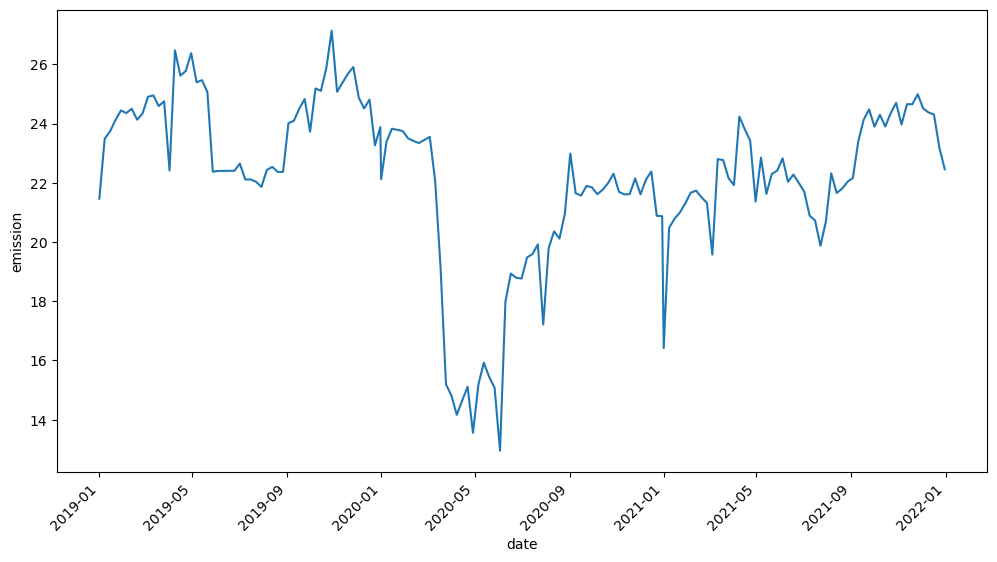

CPU times: total: 266 ms
Wall time: 309 ms


In [204]:
%%time

train_and_test = pd.concat([train, test])
train_and_test_low = train_and_test.loc[train_and_test["Location_group"] == 'Low']
train_and_test_low_by_date = train_and_test_low.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_low_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [225]:
print('Dates with lowest emissions:')
train_and_test_low_by_date['emission'].median().sort_values().head(35).sort_index()

Dates with lowest emissions:


date
2020-03-18    19.134401
2020-03-25    15.197190
2020-04-01    14.818518
2020-04-08    14.165483
2020-04-15    14.648009
2020-04-22    15.114670
2020-04-29    13.556390
2020-05-06    15.189357
2020-05-13    15.925202
2020-05-20    15.443724
2020-05-27    15.075055
2020-06-03    12.953855
2020-06-10    17.988222
2020-06-17    18.936085
2020-06-24    18.791813
2020-07-01    18.766336
2020-07-08    19.481113
2020-07-15    19.591595
2020-07-22    19.919827
2020-07-29    17.214808
2020-08-05    19.795933
2020-08-12    20.358725
2020-08-19    20.114641
2020-08-26    20.960009
2020-12-23    20.886156
2020-12-30    20.871677
2021-01-01    16.419092
2021-01-08    20.478285
2021-01-15    20.783508
2021-01-22    20.999780
2021-03-05    19.574919
2021-07-09    20.889560
2021-07-16    20.729810
2021-07-23    19.872679
2021-07-30    20.683060
Name: emission, dtype: float64

Let's look at features which median values were significantly different during COVID period, compared to the same dates in other years:

In [226]:
%%time

covid_start = pd.to_datetime('2020-03-18')
covid_finish = pd.to_datetime('2020-08-26')

# Data from COVID period
train_and_test_low_covid = train_and_test_low.loc[(train_and_test_low['date'] >= covid_start) & 
                                                  
                                                (train_and_test_low['date'] <= covid_finish)  , :]

# Data from similar periods

train_and_test_low_parallel = train_and_test_low.loc[((train_and_test_low['date'] >= covid_start - pd.DateOffset(years=1)) & 
                                                      (train_and_test_low['date'] <= covid_finish - pd.DateOffset(years=1))) |
                                                     ((train_and_test_low['date'] >= covid_start + pd.DateOffset(years=1)) & 
                                                      (train_and_test_low['date'] <= covid_finish + pd.DateOffset(years=1))) |
                                                     ((train_and_test_low['date'] >= covid_start + pd.DateOffset(years=2)) & 
                                                      (train_and_test_low['date'] <= covid_finish + pd.DateOffset(years=2))), :]


covid_features = pd.Series(index=train_and_test_low.select_dtypes(include=np.number).columns)


for feature in train_and_test_low.select_dtypes(include=np.number).columns:
    covid_features[feature] = abs(train_and_test_low_parallel[feature].median() - train_and_test_low_covid[feature].median()) /\
                              abs(train_and_test_low[feature].median())  


covid_features.sort_values(ascending=False).head(10)

CPU times: total: 78.1 ms
Wall time: 104 ms


<timed exec>:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


SulphurDioxide_SO2_column_number_density_15km     1.795494
SulphurDioxide_SO2_slant_column_number_density    1.772463
SulphurDioxide_SO2_column_number_density          1.638193
WeekCount                                         0.507246
UvAerosolIndex_absorbing_aerosol_index            0.346462
NitrogenDioxide_absorbing_aerosol_index           0.288416
emission                                          0.267582
SulphurDioxide_sensor_azimuth_angle               0.129726
SulphurDioxide_cloud_fraction                     0.118540
NitrogenDioxide_cloud_fraction                    0.107257
dtype: float64

C:\Users\mikej\AppData\Local\Temp\ipykernel_39256\3298603857.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


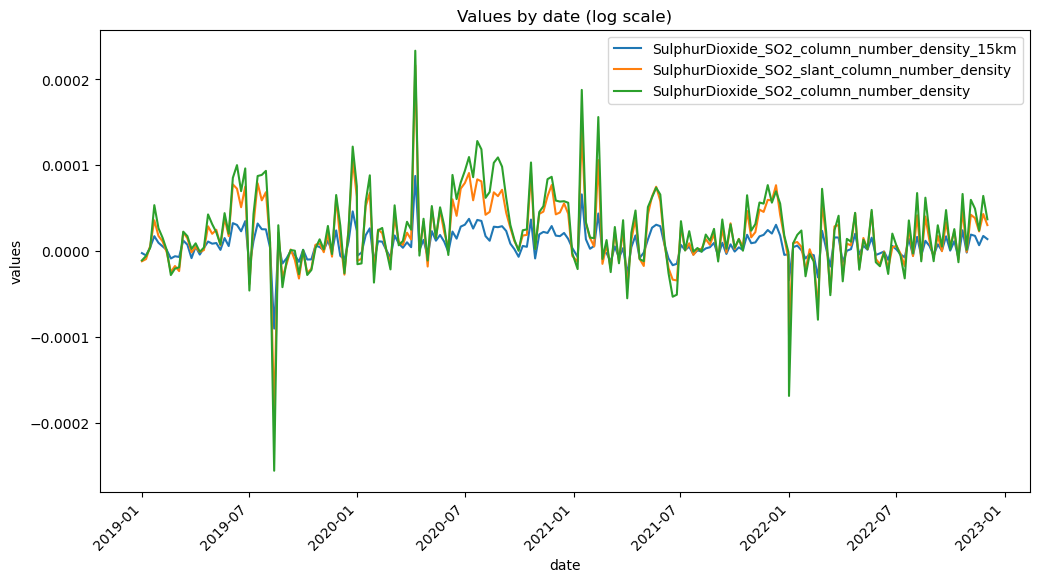

In [227]:
fig, ax = plt.subplots(figsize=(12, 6))
#sns.lineplot(data = train_and_test_low_by_date['emission'].median(), ax=ax, label='Emission')
sns.lineplot(data = train_and_test_low_by_date['SulphurDioxide_SO2_column_number_density_15km'].median(), ax=ax,
            label='SulphurDioxide_SO2_column_number_density_15km')
sns.lineplot(data = train_and_test_low_by_date['SulphurDioxide_SO2_slant_column_number_density'].median(), ax=ax,
            label='SulphurDioxide_SO2_slant_column_number_density')
sns.lineplot(data = train_and_test_low_by_date['SulphurDioxide_SO2_column_number_density'].median(), ax=ax,
            label='SulphurDioxide_SO2_column_number_density')
#ax.set_yscale('log')
ax.set(ylabel='values',
       title='Values by date (log scale)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Let's look at the High group:

<timed exec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator


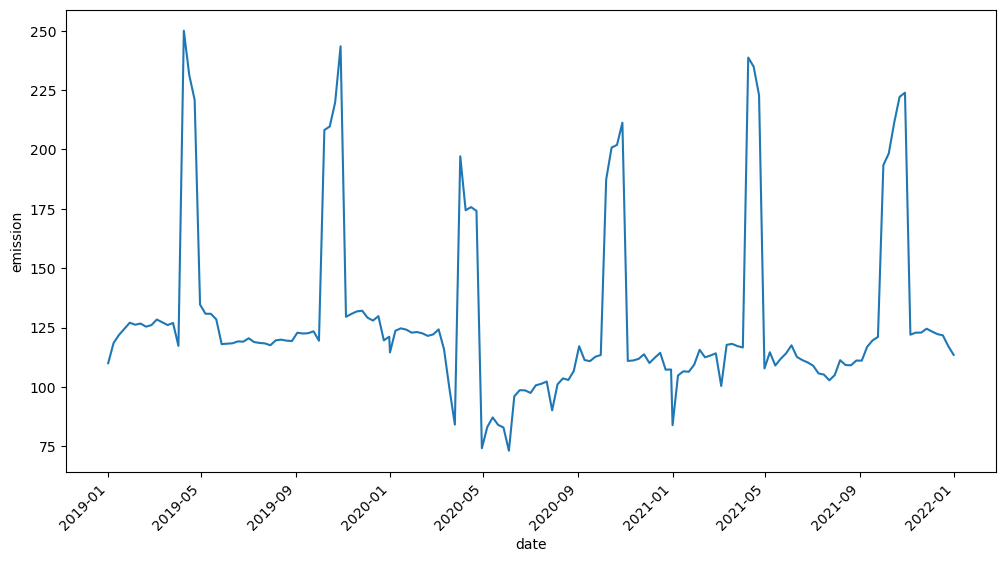

CPU times: total: 172 ms
Wall time: 210 ms


In [228]:
%%time

train_and_test_high = train_and_test.loc[train_and_test["Location_group"] == 'High']
train_and_test_high_by_date = train_and_test_high.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_high_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [229]:
print('Dates with lowest emissions:')
train_and_test_high_by_date['emission'].median().sort_values().head(35).sort_index()

Dates with lowest emissions:


date
2020-03-18     99.259068
2020-03-25     84.085532
2020-04-29     74.142530
2020-05-06     83.065750
2020-05-13     87.126493
2020-05-20     84.002552
2020-05-27     82.864621
2020-06-03     73.098295
2020-06-10     96.012905
2020-06-17     98.596475
2020-06-24     98.524512
2020-07-01     97.441265
2020-07-08    100.681434
2020-07-15    101.294815
2020-07-22    102.242162
2020-07-29     90.091030
2020-08-05    101.072553
2020-08-12    103.565370
2020-08-19    102.905435
2020-08-26    106.650352
2020-12-23    107.233415
2020-12-30    107.319817
2021-01-01     83.852945
2021-01-08    104.786550
2021-01-15    106.572760
2021-01-22    106.352975
2021-03-05    100.367595
2021-04-30    107.747749
2021-05-14    108.997302
2021-07-02    108.945240
2021-07-09    105.672485
2021-07-16    105.171747
2021-07-23    102.764980
2021-07-30    104.959855
2021-08-20    109.085270
Name: emission, dtype: float64

In [231]:
%%time

covid_start = pd.to_datetime('2020-03-18')
covid_finish = pd.to_datetime('2020-08-26')

# Data from COVID period
train_and_test_high_covid = train_and_test_high.loc[(train_and_test_high['date'] >= covid_start) & 
                                                  
                                                (train_and_test_high['date'] <= covid_finish)  , :]

# Data from similar periods

train_and_test_high_parallel = train_and_test_high.loc[((train_and_test_high['date'] >= covid_start - pd.DateOffset(years=1)) & 
                                                      (train_and_test_high['date'] <= covid_finish - pd.DateOffset(years=1))) |
                                                     ((train_and_test_high['date'] >= covid_start + pd.DateOffset(years=1)) & 
                                                      (train_and_test_high['date'] <= covid_finish + pd.DateOffset(years=1))) |
                                                     ((train_and_test_high['date'] >= covid_start + pd.DateOffset(years=2)) & 
                                                      (train_and_test_high['date'] <= covid_finish + pd.DateOffset(years=2))), :]


covid_features = pd.Series(index=train_and_test_high.select_dtypes(include=np.number).columns)


for feature in train_and_test_high.select_dtypes(include=np.number).columns:
    covid_features[feature] = abs(train_and_test_high_parallel[feature].median() - train_and_test_high_covid[feature].median()) /\
                              abs(train_and_test_high[feature].median())  


covid_features.sort_values(ascending=False).head(10)

CPU times: total: 46.9 ms
Wall time: 73.4 ms


<timed exec>:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


SulphurDioxide_SO2_column_number_density_15km             4.497207
SulphurDioxide_SO2_slant_column_number_density            3.892491
SulphurDioxide_SO2_column_number_density                  3.408136
WeekCount                                                 0.507246
UvAerosolIndex_absorbing_aerosol_index                    0.343105
NitrogenDioxide_absorbing_aerosol_index                   0.281650
emission                                                  0.193978
Formaldehyde_sensor_azimuth_angle                         0.162594
SulphurDioxide_sensor_azimuth_angle                       0.143172
NitrogenDioxide_tropospheric_NO2_column_number_density    0.134507
dtype: float64

C:\Users\mikej\AppData\Local\Temp\ipykernel_39256\1183770187.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


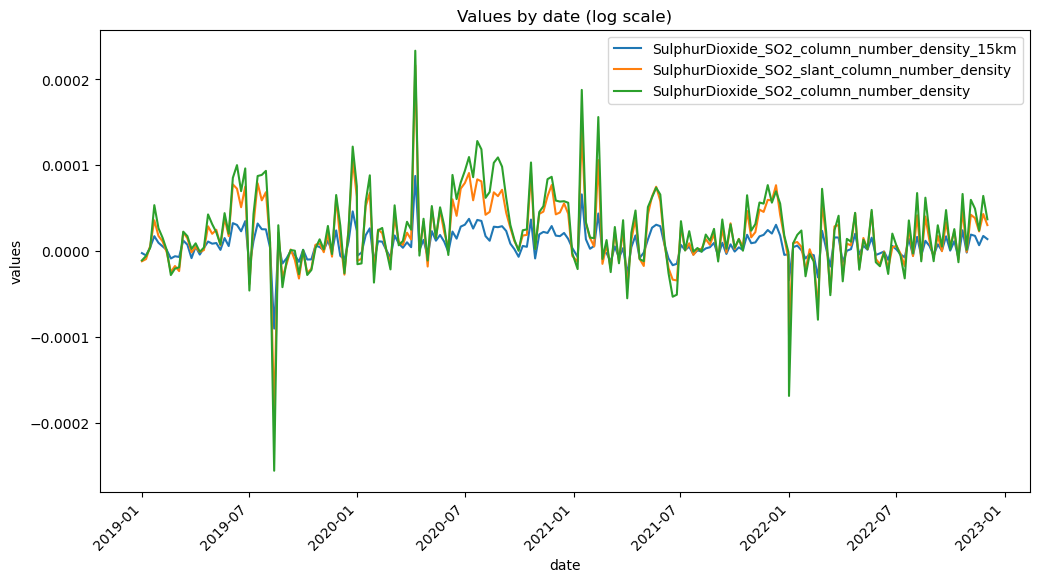

In [233]:
fig, ax = plt.subplots(figsize=(12, 6))
#sns.lineplot(data = train_and_test_low_by_date['emission'].median(), ax=ax, label='Emission')
sns.lineplot(data = train_and_test_low_by_date['SulphurDioxide_SO2_column_number_density_15km'].median(), ax=ax,
            label='SulphurDioxide_SO2_column_number_density_15km')
sns.lineplot(data = train_and_test_low_by_date['SulphurDioxide_SO2_slant_column_number_density'].median(), ax=ax,
            label='SulphurDioxide_SO2_slant_column_number_density')
sns.lineplot(data = train_and_test_low_by_date['SulphurDioxide_SO2_column_number_density'].median(), ax=ax,
            label='SulphurDioxide_SO2_column_number_density')
#ax.set_yscale('log')
ax.set(ylabel='values',
       title='Values by date (log scale)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


Let's assume these three features represent the COVID trend and let's look at differences in their values in COVID period compared to similar period in other years:

<timed exec>:45: UserWarning: FixedFormatter should only be used together with FixedLocator


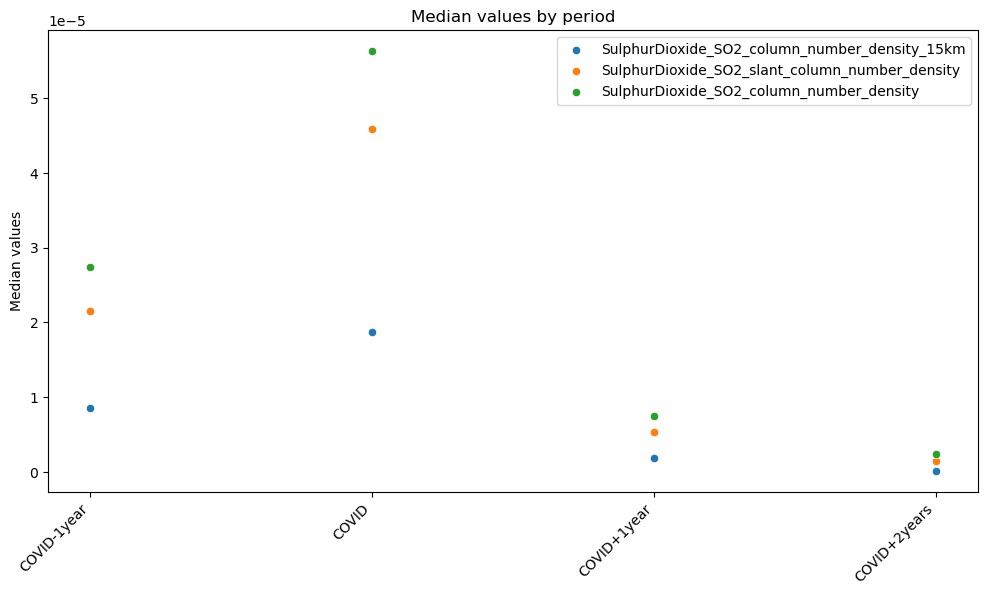

CPU times: total: 203 ms
Wall time: 251 ms


In [238]:
%%time

# Data from COVID period
train_and_test_covid = train_and_test.loc[(train_and_test['date'] >= covid_start) & 
                                                  
                                                (train_and_test['date'] <= covid_finish)  , :]

# Data from similar periods

train_and_test_parallel_minus_one = train_and_test.loc[(train_and_test['date'] >= covid_start - pd.DateOffset(years=1)) & 
                                                      (train_and_test['date'] <= covid_finish - pd.DateOffset(years=1)), :]

train_and_test_parallel_plus_one = train_and_test.loc[(train_and_test['date'] >= covid_start + pd.DateOffset(years=1)) & 
                                                      (train_and_test['date'] <= covid_finish + pd.DateOffset(years=1)), :]

train_and_test_parallel_plus_two = train_and_test.loc[(train_and_test['date'] >= covid_start + pd.DateOffset(years=2)) & 
                                                      (train_and_test['date'] <= covid_finish + pd.DateOffset(years=2)), :]

# Create a DataFrame of median values

medians_by_period = pd.DataFrame(index=['COVID-1year', 'COVID', 'COVID+1year', 'COVID+2years'])
for feature in ['SulphurDioxide_SO2_column_number_density_15km',
                'SulphurDioxide_SO2_slant_column_number_density',
                'SulphurDioxide_SO2_column_number_density']:
    medians_by_period[feature] = [
                                train_and_test_parallel_minus_one[feature].median(),
                                train_and_test_covid[feature].median(),
                                train_and_test_parallel_plus_one[feature].median(),
                                train_and_test_parallel_plus_two[feature].median(),
                                 ]
    
# Create a DataFrame of ratios of median values between periods


# Plot the median values

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data = medians_by_period['SulphurDioxide_SO2_column_number_density_15km'], ax=ax,
             label='SulphurDioxide_SO2_column_number_density_15km')
sns.scatterplot(data = medians_by_period['SulphurDioxide_SO2_slant_column_number_density'], ax=ax,
            label='SulphurDioxide_SO2_slant_column_number_density')
sns.scatterplot(data = medians_by_period['SulphurDioxide_SO2_column_number_density'], ax=ax,
            label='SulphurDioxide_SO2_column_number_density')
ax.set(ylabel='Median values',
       title='Median values by period')
#ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
